# Feature 

In [2]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import snownlp
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from textblob import TextBlob
from snownlp import SnowNLP


<font size=6>Read file</font>

In [9]:
train_data_path = './dataset/label/train.pkl'
save_data_path = './feature/train_feature.pkl'

train = pd.read_pickle(train_data_path)
save = True
'''
train = train.loc[train['n_comment'] != -1]
train = train.loc[train['abstract'] != '']
train = train.loc[train['abstract'] != ' ']
train = train.loc[train['abstract'] != '  ']
train = train.loc[train['headline'] != '']
train = train.drop(index = [31840, 8580, 23040, 23365, 27631, 42070, 36259])
train = train.reset_index().drop(columns=['index'])
'''
train

,web_url,print_section,print_page,news_desk,section_name,type_of_material,word_count,subsection_name,pub_year,pub_month,...,abstract_len,abstract_dup,headline,headline_len,headline_dup,headline_kicker,len_lead,keywords,authors,n_comment
0,https://www.nytimes.com/2020/12/31/opinion/202...,A,18,OpEd,Opinion,Op-Ed,882,NaN,2021,1,...,8,0,Things Will Get Better. Seriously.,5,0,None,54,"[Biden, Joseph R Jr, United States Economy, La...",[Paul Krugman],854
1,https://www.nytimes.com/2020/12/31/us/george-f...,A,17,National,U.S.,News,861,NaN,2021,1,...,29,0,Minneapolis Police Release Body Camera Video o...,13,0,None,37,"[Idd, Dolal B, Police Brutality, Misconduct an...",[Nicholas Bogel-Burroughs],0
2,https://www.nytimes.com/2020/12/31/us/resolvin...,NaN,NaN,Express,U.S.,News,263,NaN,2021,1,...,51,0,Resolving to live a lot better than in 2020.,9,0,None,51,[],[Concepción de León],0
3,https://www.nytimes.com/2020/12/31/us/politics...,NaN,NaN,Washington,U.S.,News,695,Politics,2021,1,...,29,0,Justice Dept. Asks Judge to Toss Election Laws...,10,0,None,14,"[Justice Department, Presidential Election of ...","[Maggie Haberman, Katie Benner]",0
4,https://www.nytimes.com/2020/12/31/world/the-u...,NaN,NaN,Foreign,World,News,438,NaN,2021,1,...,39,0,The U.S. reaches 20 million cases.,6,0,None,39,[internal-essential],[Kate Taylor],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82712,https://www.nytimes.com/2022/12/31/movies/tar-...,NaN,NaN,Culture,Movies,News,1587,NaN,2022,12,...,14,0,Breaking Out of the #MeToo Movie Formula,7,0,Critic’s Notebook,116,"[#MeToo Movement, Movies, Sex Crimes, Blanchet...",[Amanda Hess],25
82713,https://www.nytimes.com/2022/12/31/opinion/bar...,NaN,NaN,OpEd,Opinion,Op-Ed,1169,NaN,2022,12,...,16,0,Katie Couric: What Barbara Walters Made Possib...,9,0,Guest Essay,22,"[Women and Girls, Television, Walters, Barbara...",[Katie Couric],0
82714,https://www.nytimes.com/2022/12/31/obituaries/...,NaN,NaN,Obits,Obituaries,News,969,NaN,2022,12,...,21,0,"Jean Franco, 98, Pioneering Scholar of Latin A...",10,0,None,41,"[Colleges and Universities, Books and Literatu...",[Clay Risen],0
82715,https://www.nytimes.com/2022/12/31/us/snowy-ow...,NaN,NaN,Express,U.S.,News,653,NaN,2022,12,...,15,0,‘Extremely Rare’ Snowy Owl Sighting Transfixes...,9,0,None,29,"[Owls, Audubon Society, National, ARCTIC REGIO...",[Michael Levenson],0


<font size=6>Set bound of popularity</font>

In [10]:
median = train['n_comment'].median()
print(f'Median: {median}')
train['is_popular'] = train['n_comment'].apply(lambda x : 1 if x > median else 0)
pop_count = 0
for i in train['is_popular']:
    if i:
        pop_count += 1
print('popular:    ' , pop_count / len(train))
print('not popular:' , 1 - pop_count / len(train))
#train = train.drop(columns = ['n_comment'])

Median: 0.0
popular:     0.2923341030259802
not popular: 0.7076658969740198


In [64]:
print(train.columns)

Index(['web_url', 'print_section', 'print_page', 'news_desk', 'section_name',
       'type_of_material', 'word_count', 'subsection_name', 'pub_year',
       'pub_month', 'pub_date', 'pub_weekday', 'pub_time', 'abstract',
       'abstract_len', 'abstract_dup', 'headline', 'headline_len',
       'headline_dup', 'headline_kicker', 'len_lead', 'keywords', 'authors',
       'n_comment', 'is_popular', 'is_noon', 'is_weekday',
       'group_by_news_desk', 'feature_news_desk', 'is_party', 'is_congress',
       'is_president', 'is_ukrainian_russian_war', 'is_covid', 'is_storm'],
      dtype='object')


<font size=6>Hour</font>


pub_time
0     0.277054
1     0.241703
2     0.355309
3     0.251810
4     0.213712
5     0.258752
6     0.440053
7     0.640902
8     0.520192
9     0.512212
10    0.481106
11    0.231322
12    0.187640
13    0.186487
14    0.284030
15    0.260712
16    0.250265
17    0.178732
18    0.213309
19    0.219506
20    0.171498
21    0.140594
22    0.149298
23    0.269252
Name: is_popular, dtype: float64
Correlation of 'is_noon':0.28047677768544965


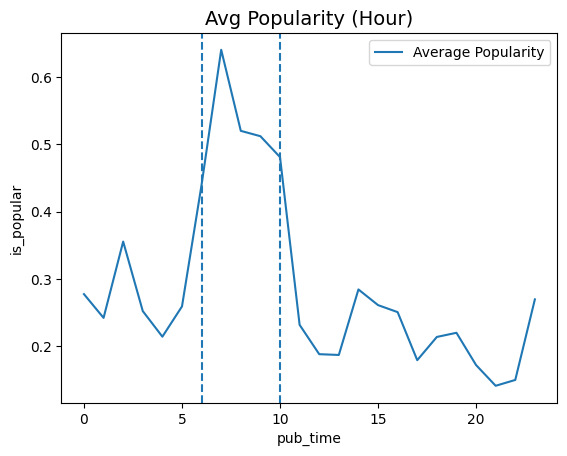

In [44]:
print(train.groupby('pub_time')['is_popular'].mean())
sns.lineplot(data = train.groupby('pub_time')['is_popular'].mean(),  label='Average Popularity')
plt.title('Avg Popularity (Hour)', fontsize=14)
plt.axvline(x = 6, linestyle= '--')
plt.axvline(x = 10, linestyle= '--')


train['is_noon'] = train['pub_time'].apply(lambda x : 1 if (6 <= x and x <= 10) else 0)
print(f"Correlation of 'is_noon': {train.corr(numeric_only=True)['is_popular']['is_noon']}")

<font size=6>Weekday</font>

pub_weekday
0    0.344567
1    0.299707
2    0.303597
3    0.310125
4    0.258560
5    0.221438
6    0.259665
Name: is_popular, dtype: float64
Correlation of 'is_weekday': 0.046439273110494735


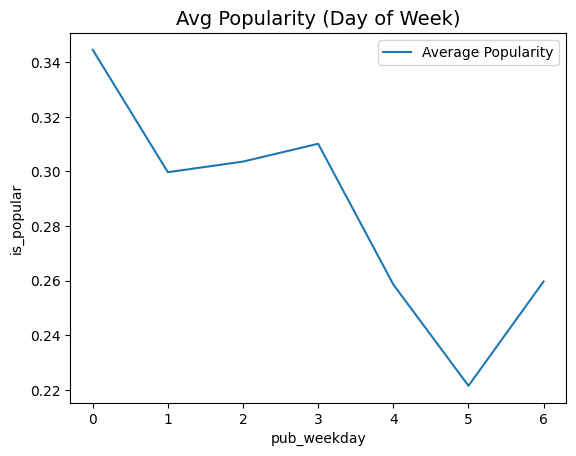

In [51]:
print(train.groupby('pub_weekday')['is_popular'].mean())
sns.lineplot(data = train.groupby('pub_weekday')['is_popular'].mean(),  label='Average Popularity')
plt.title('Avg Popularity (Day of Week)', fontsize=14)

train['is_weekday'] = train['pub_weekday'].apply(lambda x : 1 if (x < 5) else 0)
print(f"Correlation of 'is_weekday': {train.corr(numeric_only=True)['is_popular']['is_weekday']}")

<font size=6>Day of week</font>

0.046439273110494735


Text(0.5, 1.0, 'Avg Popularity (Day of Week)')

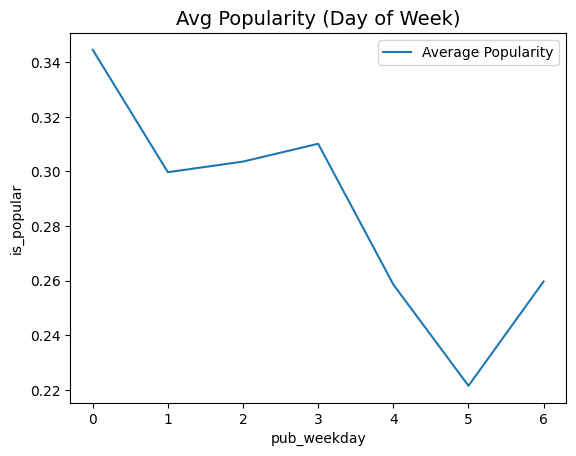

<font size=6>Date of month</font>

pub_date
1     0.300535
2     0.278856
3     0.305251
4     0.301267
5     0.236609
6     0.310263
7     0.324594
8     0.243764
9     0.294867
10    0.314970
11    0.306531
12    0.295489
13    0.289985
14    0.304998
15    0.285016
16    0.306622
17    0.314779
18    0.304536
19    0.293722
20    0.317547
21    0.309622
22    0.298455
23    0.285868
24    0.292445
25    0.299084
26    0.305887
27    0.194715
28    0.322790
29    0.304728
30    0.295455
31    0.309353
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (day)')

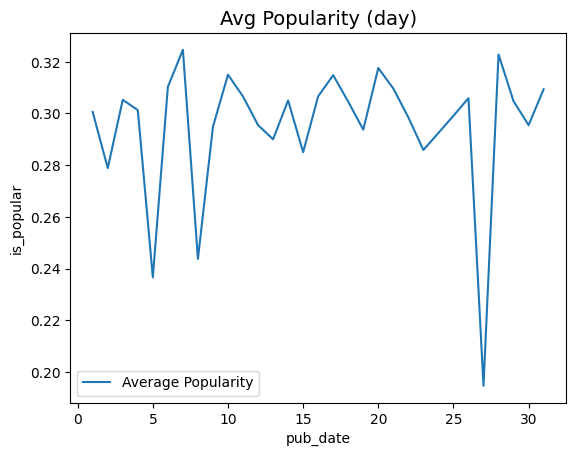

In [52]:
print(train.groupby('pub_date')['is_popular'].mean())
sns.lineplot(data = train.groupby('pub_date')['is_popular'].mean(),  label='Average Popularity')
plt.title('Avg Popularity (day)', fontsize=14)

<font size=6>Month</font>

pub_month
1     0.227325
2     0.284910
3     0.305273
4     0.306622
5     0.297835
6     0.284966
7     0.277210
8     0.295867
9     0.305366
10    0.328541
11    0.281259
12    0.336220
Name: is_popular, dtype: float64


Text(0.5, 1.0, 'Avg Popularity (month)')

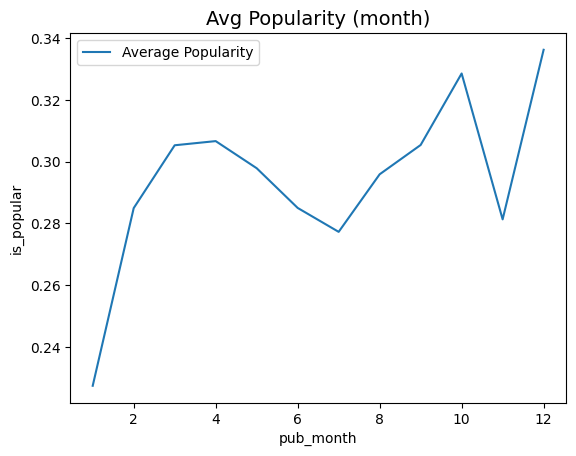

In [53]:
print(train.groupby('pub_month')['is_popular'].mean())
sns.lineplot(data = train.groupby('pub_month')['is_popular'].mean(),  label='Average Popularity')
plt.title('Avg Popularity (month)', fontsize=14)

# train['is_lowmonth'] = train['pub_time'].apply(lambda x : 0 if (x <= 2) else 1)
# print(train.corr()['is_popular']['is_lowmonth'])

<font size=6>News desk</font>

In [59]:
col = 'news_desk'
dst = 'newsdesk'
train[f'group_by_{col}'] = train['is_popular'].groupby(train[f'{col}']).transform('mean')
# train = train.reset_index(drop=True)
table = dict()
for i in range(len(train)):
    table[train[f'{col}'][i]] = train[f'group_by_{col}'][i]

with open(f'./table/{dst}.pkl', 'wb') as handle:
    pickle.dump(table, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(table)

train
train = train.sort_values(['group_by_news_desk'],ascending=False)
print(train.corr(numeric_only=True)['is_popular'][f'group_by_{col}'])
train[f'feature_{col}'] = train[f'group_by_{col}'].apply(lambda x : round(x, 1))
print(train.corr(numeric_only=True)['is_popular'][f'feature_{col}'])

{'Games': 0.9626391096979332, 'Upshot': 0.9571428571428572, 'Learning': 0.8456614509246089, 'RealEstate': 0.8406725380304243, 'Well': 0.784971098265896, 'Travel': 0.7495069033530573, 'Insider': 0.732824427480916, 'Magazine': 0.7258566978193146, 'NYTI': 0.6666666666666666, 'Metropolitan': 0.6470588235294118, 'Parenting': 0.6328125, 'The Learning Network': 0.6220472440944882, 'Investigative': 0.5897435897435898, 'Editorial': 0.5498575498575499, 'OpEd': 0.5213555243633446, 'Arts&Leisure': 0.4835965978128797, 'Headway': 0.4444444444444444, 'Climate': 0.4279891304347826, 'Science': 0.4175824175824176, 'Dining': 0.41429369067560023, 'Metro': 0.4130886426592798, 'Video': 0.36666666666666664, 'Culture': 0.351556420233463, 'Opinion': 0.3387096774193548, 'Podcasts': 0.31315626930203827, 'SundayBusiness': 0.30939226519337015, 'SpecialSections': 0.2824858757062147, 'Books': 0.27882037533512066, 'Gender': 0.2641509433962264, 'The Upshot': 0.26153846153846155, 'Washington': 0.25979591836734695, 'Sty

<font size=6>Section</font>

In [11]:
col = 'section_name'
dst = 'section'
train[f'group_by_{col}'] = train['is_popular'].groupby(train[f'{col}']).transform('mean')
table = dict()
for i in range(len(train)):
    table[train[f'{col}'][i]] = train[f'group_by_{col}'][i]

with open(f'./table/{dst}.pkl', 'wb') as handle:
    pickle.dump(table, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(table)

#train
#train = train.sort_values(['group_by_news_desk'],ascending=False)
print(train.corr()['is_popular'][f'group_by_{col}'])
train[f'feature_{col}'] = train[f'group_by_{col}'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular'][f'feature_{col}'])

{'Opinion': 0.46581280788177337, 'U.S.': 0.21664034741413343, 'World': 0.19875933662488923, 'Today’s Paper': 0.002232142857142857, 'Corrections': 0.0, 'Briefing': 0.01037117903930131, 'Style': 0.2549295774647887, 'Sports': 0.22435897435897437, 'Business Day': 0.22910835665733706, 'New York': 0.4203378602186154, 'Well': 0.7889784946236559, 'Movies': 0.1352973267866885, 'The Upshot': 0.6746575342465754, 'Climate': 0.42242703533026116, 'Science': 0.37409200968523004, 'Real Estate': 0.7730870712401056, 'Your Money': 0.08552631578947369, 'Arts': 0.30927606818684966, 'Books': 0.2216, 'Food': 0.4095299420476497, 'Health': 0.4102870813397129, 'At Home': 0.0, 'Admin': 0.038461538461538464, 'Obituaries': 0.15591397849462366, 'Crosswords & Games': 0.9636363636363636, 'Times Insider': 0.8212765957446808, 'Theater': 0.48014440433212996, 'Technology': 0.3271276595744681, 'The Learning Network': 0.827426810477658, 'Podcasts': 0.5700280112044818, 'Magazine': 0.7205346294046172, 'Fashion & Style': 0.25

<font size=6>Subsection</font>

In [12]:
col = 'subsection_name'
dst = 'subsection'
train[f'group_by_{col}'] = train['is_popular'].groupby(train[f'{col}']).transform('mean')
table = dict()
for i in range(len(train)):
    table[train[f'{col}'][i]] = train[f'group_by_{col}'][i]

with open(f'./table/{dst}.pkl', 'wb') as handle:
    pickle.dump(table, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(table)

#train
#train = train.sort_values(['group_by_news_desk'],ascending=False)
print(train.corr()['is_popular'][f'group_by_{col}'])
train[f'feature_{col}'] = train[f'group_by_{col}'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular'][f'feature_{col}'])

{nan: nan, nan: nan, 'Politics': 0.2669017005391954, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 'College Football': 0.2087912087912088, nan: nan, nan: nan, nan: nan, 'Family': 0.9016393442622951, 'Olympics': 0.0903954802259887, nan: nan, nan: nan, nan: nan, nan: nan, 'Hockey': 0.25, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 'Asia Pacific': 0.28211749515816653, nan: nan, nan: nan, nan: nan, 'Soccer': 0.20518867924528303, 'Television': 0.452572347266881, 'Music': 0.24116847826086957, nan: nan, nan: nan, nan: nan, nan: nan, 'Book Review': 0.1436651583710407, 'Self-Care': 0.375, nan: nan, nan: nan, 'Americas': 0.2893081761006289, nan: nan, 'Europe': 0.20643827525103367, 'Art & Design': 0.31889290012033694, nan: nan, nan: nan, 'Canada': 0.1218274111675127, nan: nan, nan: nan, nan: nan, nan: nan, 'Middle East': 0.20977917981072555, nan: nan, nan: nan, 'Economy': 0.4020797227036395, nan: nan, nan: nan, nan: nan, nan: n

<font size=6>Material</font>

In [13]:
col = 'type_of_material'
dst = 'material'
train[f'group_by_{col}'] = train['is_popular'].groupby(train[f'{col}']).transform('mean')
table = dict()
for i in range(len(train)):
    table[train[f'{col}'][i]] = train[f'group_by_{col}'][i]

with open(f'./table/{dst}.pkl', 'wb') as handle:
    pickle.dump(table, handle, protocol=pickle.HIGHEST_PROTOCOL)
print(table)

#train
#train = train.sort_values(['group_by_news_desk'],ascending=False)
print(train.corr()['is_popular'][f'group_by_{col}'])
train[f'feature_{col}'] = train[f'group_by_{col}'].apply(lambda x : round(x, 1))
print(train.corr()['is_popular'][f'feature_{col}'])

{'Op-Ed': 0.5198487712665406, 'News': 0.3318475317642158, 'Quote': 0.0, 'Correction': 0.0, 'briefing': 0.16906130268199235, 'Interactive Feature': 0.20671140939597316, 'Obituary (Obit)': 0.16155291170945524, 'Letter': 0.0022701475595913734, 'Editorial': 0.5085714285714286, 'Review': 0.25048923679060664, '': 0.0, 'List': 0.013888888888888888, 'News Analysis': 0.5662650602409639, "Editors' Note": 0.0, 'An Appraisal': 0.0, 'Biography': 0.0}
0.18974955591669387
0.1836612626362872


<font size=6>Keyword</font>

<font size=5>Politics<font size=4>( party, congress, president )</font></font>


In [61]:
train['is_party'] = train['keywords'].apply(lambda x: 1 if ('Democratic Party' in x or 'Republican Party' in x ) else 0)
train['is_congress'] = train['keywords'].apply(lambda x: 1 if ('House of Representatives' in x or 'Senate' in x) else 0)
train['is_president'] = train['keywords'].apply(lambda x: 1 if ('Trump, Donald J' in x or 'Biden, Joseph R Jr' in x)else 0)
print(train.corr(numeric_only=True)['is_popular']['is_party'])
print(train.corr(numeric_only=True)['is_popular']['is_congress'])
print(train.corr(numeric_only=True)['is_popular']['is_president'])

0.0813836968356617
0.014719869587907023
0.06000401398516538


<font size=5>Event <font size=4>( Ukrainian_Russian_war, covid, Storming of the US Capitol )</font></font>


In [62]:
train['is_ukrainian_russian_war'] = train['keywords'].apply(lambda x: 1 if ('War and Armed Conflicts' in x or 'Ukraine' in x ) else 0)
train['is_covid'] = train['keywords'].apply(lambda x: 1 if 'Coronavirus (2019-nCoV)' in x else 0)
train['is_storm'] = train['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
print('ukrainian_russian_war     ', train.corr(numeric_only=True)['is_popular']['is_ukrainian_russian_war'])
print('Coronavirus               ', train.corr(numeric_only=True)['is_popular']['is_covid'])
print('Storming of the US Capitol', train.corr(numeric_only=True)['is_popular']['is_storm'])

ukrainian_russian_war      -0.011306296114816893
Coronavirus                -0.030746851396141833
Storming of the US Capitol 0.023417997512603917


<font size=5>News game<font size=4>(spelling bee, crossword puzzle)</font></font>

In [16]:
train['is_spell'] = train['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)' in x else 0)
train['is_crossword'] = train['keywords'].apply(lambda x: 1 if 'Crossword Puzzles' in x else 0)
train['is_game'] = train['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
print(train.corr()['is_popular']['is_spell'])
print(train.corr()['is_popular']['is_crossword'])
print(train.corr()['is_popular']['is_game'])

0.1159666087988717
0.12746626759797472
0.1730848863570038


<font size=6>Headline length</font>

-0.03451776582745452


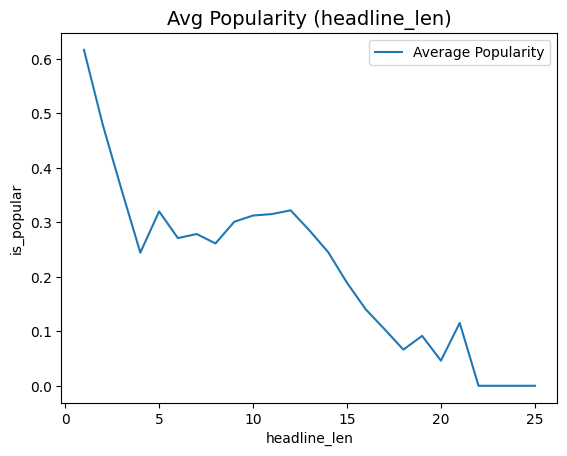

In [68]:
sns.lineplot(data = train['is_popular'].groupby(train['headline_len']).mean(),  label='Average Popularity')
plt.title('Avg Popularity (headline_len)', fontsize=14)
print(train.corr(numeric_only=True)['is_popular']['headline_len'])

<font size=6>Abstract length</font>

-0.008791974620136946


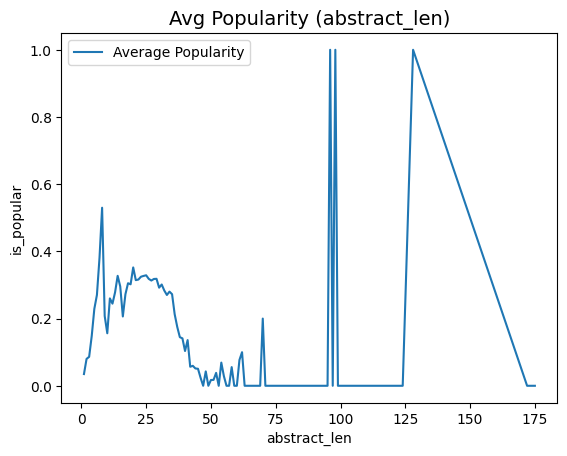

In [70]:
sns.lineplot(data = train['is_popular'].groupby(train['abstract_len']).mean(),  label='Average Popularity')
plt.title('Avg Popularity (abstract_len)', fontsize=14)
print(train.corr(numeric_only=True)['is_popular']['abstract_len'])

<font size=6>Word count</font>

0.2544903250503542


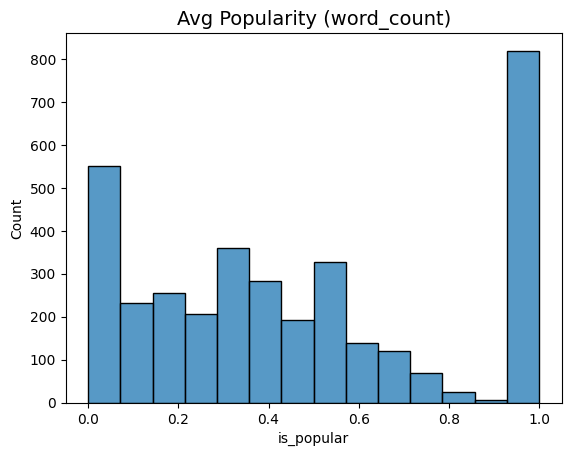

In [75]:
sns.histplot(data = train['is_popular'].groupby(train['word_count']).mean(),  label='Average Popularity')
plt.title('Avg Popularity (word_count)', fontsize=14)
print(train.corr(numeric_only=True)['is_popular']['word_count'])

0.04410919131401947


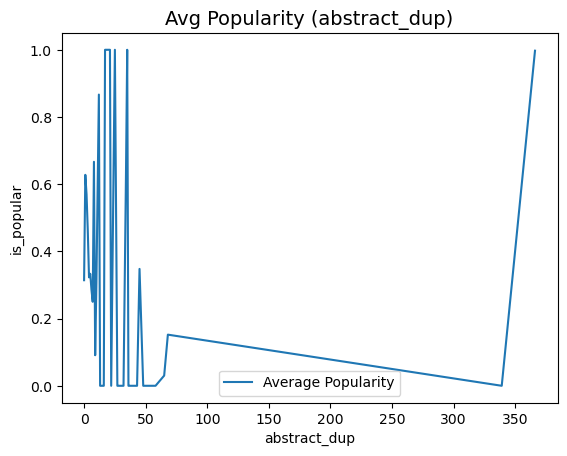

In [20]:
sns.lineplot(data = train.groupby('abstract_dup').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (abstract_dup)', fontsize=14)
print(train.corr()['is_popular']['abstract_dup'])

<font size=6>Lead paragraph length</font>

0.04667152647048925


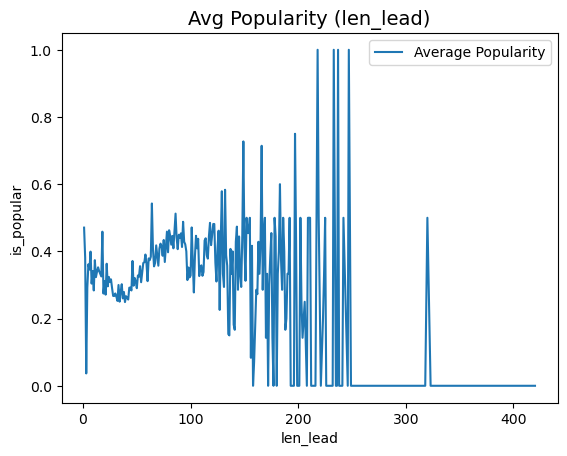

In [21]:
#print(train.groupby('abstract_len').mean()['is_popular'])
sns.lineplot(data = train.groupby('len_lead').mean()['is_popular'],  label='Average Popularity')
plt.title('Avg Popularity (len_lead)', fontsize=14)
print(train.corr()['is_popular']['len_lead'])

<font size = 6>Sentiment analyze</font>

<font size = 5>punctuation removal</font>

In [22]:
punct_list = list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
def remove_punctuation(headline):
    for punc in punct_list:
        if punc in headline:
            headline = headline.replace(punc, ' ')
    return headline
train['clean_headline'] = train['headline'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [23]:

text = "i am happy today."
blob = TextBlob(text)
# get the sentiment of the text
sentiment = blob.sentiment
print(sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [24]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
train['sentiment_tb_polar'] = train['clean_headline'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
train['sentiment_tb_polar_abs'] = train['sentiment_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
train['sentiment_tb_subj'] = train['clean_headline'].apply(lambda x : tb_score_subj(x))#0 ~ 1
train['sentiment_tb_pos'] = train['sentiment_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(train.corr()['is_popular']['sentiment_tb_polar'])
print(train.corr()['is_popular']['sentiment_tb_polar_abs'])
print(train.corr()['is_popular']['sentiment_tb_subj'])
print(train.corr()['is_popular']['sentiment_tb_pos'])

0.0008044140424590058
0.023688289701197757
0.02534893974363013
0.0037961736890695977


<font size = 5>vader</font>

In [25]:
headline = 'today is a sunny day!'
analyzer = SentimentIntensityAnalyzer ()
sentiment_dict = analyzer.polarity_scores(headline)
print(sentiment_dict)

{'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'compound': 0.4753}


In [26]:
train['sentiment_vader_neg'] = train['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
train['sentiment_vader_neu'] = train['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
train['sentiment_vader_pos'] = train['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
train['sentiment_vader_compound'] = train['clean_headline'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
train['sentiment_vader_compound_abs'] = train['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(train.corr()['is_popular']['sentiment_vader_neg'])
print(train.corr()['is_popular']['sentiment_vader_neu'])
print(train.corr()['is_popular']['sentiment_vader_pos'])
print(train.corr()['is_popular']['sentiment_vader_compound'])
print(train.corr()['is_popular']['sentiment_vader_compound_abs'])

-0.009686725775924844
-0.00870624564258787
0.022072307371213892
0.022333821922085516
-0.012276245493700098


<font size = 5>snownlp</font>

In [27]:
headline = 'i am happy'
sentence = 'hello","why is it not working?!'
s = SnowNLP(headline)
print(s.sentiments)

0.1837233963534416


In [28]:
train['sentiment_snow'] = train['clean_headline'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
train['sentiment_snow_abs'] = train['sentiment_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
train['sentiment_snow_pos'] = train['sentiment_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(train.corr()['is_popular']['sentiment_snow'])
print(train.corr()['is_popular']['sentiment_snow_abs'])
print(train.corr()['is_popular']['sentiment_snow_pos'])

0.007474427612226912
-0.016238225917170817
-0.022035047367087533


<font size = 6>abstract</font>

In [29]:

train['clean_abstract'] = train['abstract'].apply(lambda x: remove_punctuation(x))

<font size = 5>textblob</font>

In [30]:
def tb_score_polar(headline):
    score = TextBlob(headline).sentiment[0]
    return score
def tb_score_subj(headline):
    score = TextBlob(headline).sentiment[1]
    return score
train['sentiment_abstract_tb_polar'] = train['clean_abstract'].apply(lambda x : tb_score_polar(x))#-1 ~ 1
train['sentiment_abstract_tb_polar_abs'] = train['sentiment_abstract_tb_polar'].apply(lambda x :abs(x))#0 ~ 1
train['sentiment_abstract_tb_subj'] = train['clean_abstract'].apply(lambda x : tb_score_subj(x))#0 ~ 1
train['sentiment_abstract_tb_pos'] = train['sentiment_abstract_tb_polar'].apply(lambda x : 1 if x > 0 else 0)#bool
print(train.corr()['is_popular']['sentiment_abstract_tb_polar'])
print(train.corr()['is_popular']['sentiment_abstract_tb_polar_abs'])
print(train.corr()['is_popular']['sentiment_abstract_tb_subj'])
print(train.corr()['is_popular']['sentiment_abstract_tb_pos'])

0.023174836604924327
0.04925605820273595
0.053083589845526934
0.03505408932165935


<font size = 5>vader</font>

In [31]:
train['sentiment_abstract_vader_neg'] = train['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neg'])#0 ~ 1
train['sentiment_abstract_vader_neu'] = train['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['neu'])#0 ~ 1
train['sentiment_abstract_vader_pos'] = train['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['pos'])#0 ~ 1
train['sentiment_abstract_vader_compound'] = train['clean_abstract'].apply(lambda x : analyzer.polarity_scores(x)['compound'])#-1 ~ 1
train['sentiment_abstract_vader_compound_abs'] = train['sentiment_vader_compound'].apply(lambda x : abs(x))#0 ~ 1
print(train.corr()['is_popular']['sentiment_abstract_vader_neg'])
print(train.corr()['is_popular']['sentiment_abstract_vader_neu'])
print(train.corr()['is_popular']['sentiment_abstract_vader_pos'])
print(train.corr()['is_popular']['sentiment_abstract_vader_compound'])
print(train.corr()['is_popular']['sentiment_abstract_vader_compound_abs'])

0.005645109367282879
-0.06655813945885308
0.08116259398621124
0.041882394630012476
-0.012276245493700098


<font size = 5>snownlp</font>

In [32]:
train['sentiment_abstract_snow'] = train['clean_abstract'].apply(lambda x : SnowNLP(x).sentiments)#0 ~ 1
train['sentiment_abstract_snow_abs'] = train['sentiment_abstract_snow'].apply(lambda x : 2 * abs(x - 0.5))#-1 ~ 1
train['sentiment_abstract_snow_pos'] = train['sentiment_abstract_snow'].apply(lambda x : 1 if x > 0.5 else 0)#bool
print(train.corr()['is_popular']['sentiment_abstract_snow'])
print(train.corr()['is_popular']['sentiment_abstract_snow_abs'])
print(train.corr()['is_popular']['sentiment_abstract_snow_pos'])

0.04657711998969139
-0.03422619912916177
0.028726254036756244


In [33]:
train = train.drop(columns=['web_url', 'print_section', 'print_page', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'pub_weekday'])

In [34]:
fea_list = train.corr()['is_popular']
fea_list = fea_list.sort_values(key = lambda x : abs(x), ascending=False)
print(fea_list)

is_popular                               1.000000
n_comment                                0.454114
group_by_news_desk                       0.446084
feature_news_desk                        0.442014
group_by_section_name                    0.422631
feature_section_name                     0.420482
group_by_subsection_name                 0.374180
feature_subsection_name                  0.370269
is_noon                                  0.270334
word_count                               0.204368
group_by_type_of_material                0.189750
feature_type_of_material                 0.183661
is_game                                  0.173085
pub_time                                -0.161595
is_crossword                             0.127466
is_spell                                 0.115967
sentiment_abstract_vader_pos             0.081163
headline_len                            -0.078597
is_party                                 0.074725
is_weekday                               0.067009


In [35]:
suit_attribute = []
for i in range(40):
    suit_attribute.append(fea_list.index[i])
for col in train.columns:
    if col not in suit_attribute:
        train = train.drop(columns = col)
        print(col)
        
#print(list.columns)
#list.sort_values(list, key = lambda x: x[1])
#print(list)

news_desk
section_name
type_of_material
subsection_name
pub_month
pub_day
keywords
authors
is_lowmonth
is_covid
clean_headline
sentiment_tb_polar
sentiment_tb_pos
sentiment_vader_neg
sentiment_vader_neu
sentiment_vader_compound_abs
sentiment_snow
sentiment_snow_abs
clean_abstract
sentiment_abstract_vader_neg
sentiment_abstract_vader_compound_abs


In [36]:
print(train.corr()['is_popular'])

word_count                           0.204368
pub_time                            -0.161595
abstract_len                        -0.038289
headline_len                        -0.078597
len_lead                             0.046672
n_comment                            0.454114
is_popular                           1.000000
is_noon                              0.270334
is_weekday                           0.067009
group_by_news_desk                   0.446084
feature_news_desk                    0.442014
group_by_section_name                0.422631
feature_section_name                 0.420482
group_by_subsection_name             0.374180
feature_subsection_name              0.370269
group_by_type_of_material            0.189750
feature_type_of_material             0.183661
is_party                             0.074725
is_congress                          0.031269
is_president                         0.055248
is_ukrainian_russian_war            -0.017116
is_storm                          

<AxesSubplot:>

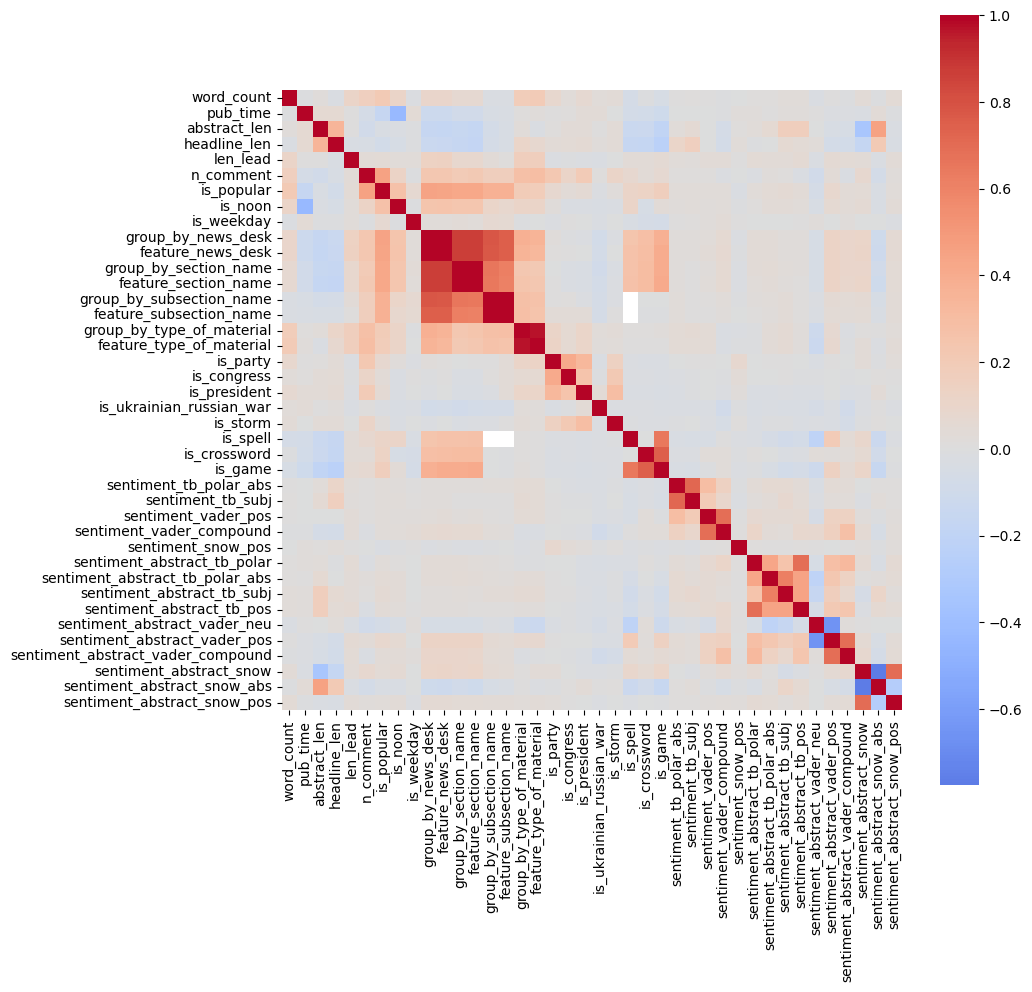

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center=0)

In [38]:
train = train.drop(columns = 'n_comment')
'''
train = train.drop(columns=['group_by_news_desk', 'group_by_section_name', 'group_by_subsection_name',
                            'group_by_type_of_material', 'feature_news_desk', 'feature_subsection_name',
                           'sentiment_abstract_snow', 'sentiment_abstract_vader_compound', 'sentiment_vader_compound', 
                           'sentiment_abstract_vader_neu', 'is_game',  'sentiment_abstract_tb_pos'])
train.columns
'''


''

<AxesSubplot:>

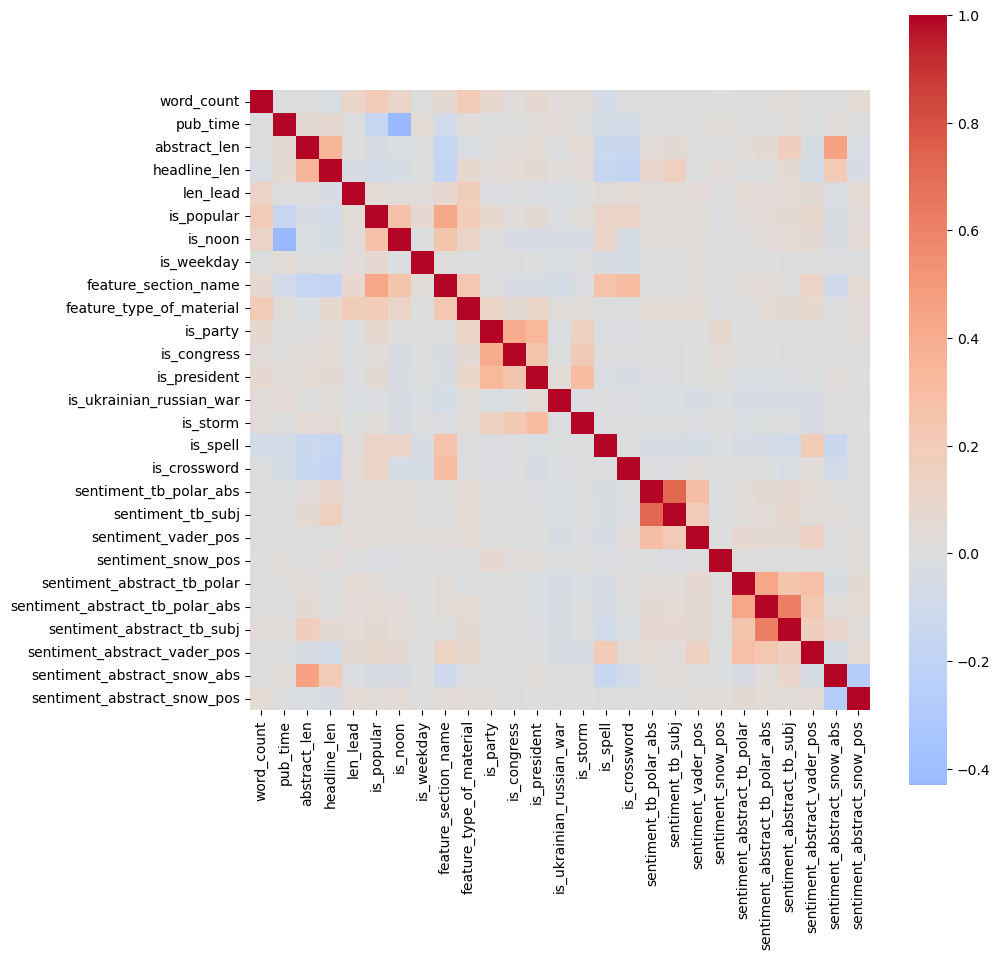

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='coolwarm', annot=False, square=True, fmt='.2f', cbar=True, center=0)

<AxesSubplot:>

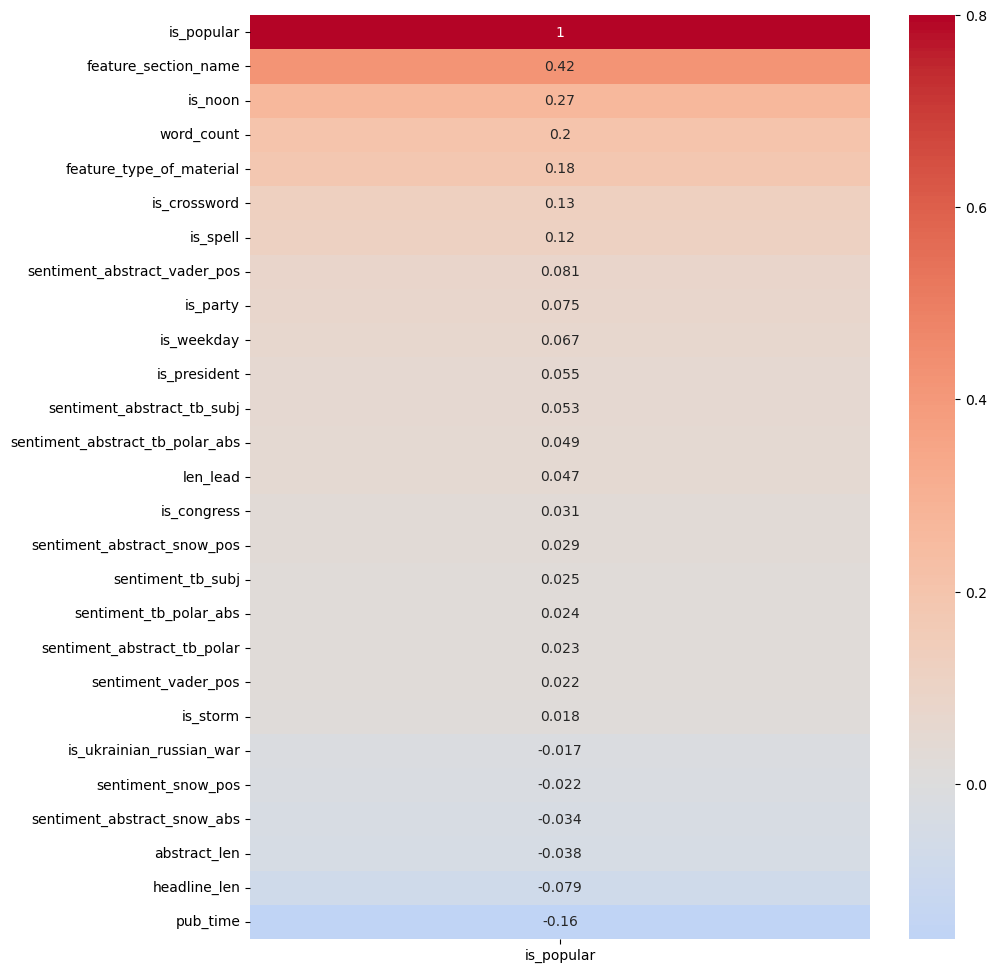

In [40]:
plt.figure(figsize=(10,12))
sns.heatmap(train.corr()[['is_popular']].sort_values(ascending=False, by='is_popular'), 
            cmap='coolwarm', annot=True, vmax=0.8, center=0)

# Check the features

In [41]:
if save:
    train.to_pickle(f'./feature/{feat_data}.pkl')
feat = pd.read_pickle(f'./feature/{feat_data}.pkl')
feat

,word_count,pub_month,pub_time,abstract_len,headline_len,len_lead,is_popular,is_noon,is_weekday,feature_section_name,...,sentiment_vader_compound_abs,sentiment_snow_abs,sentiment_snow_pos,sentiment_abstract_tb_polar,sentiment_abstract_tb_polar_abs,sentiment_abstract_tb_subj,sentiment_abstract_vader_pos,sentiment_abstract_vader_compound_abs,sentiment_abstract_snow_abs,sentiment_abstract_snow_pos
54115,1088,9,18,28,10,33,0,0,1,0.2,...,0.7506,0.590545,1,0.225000,0.225000,0.400000,0.173,0.7506,0.069414,1
16691,1286,7,8,23,11,35,1,1,1,0.2,...,0.0000,0.440317,0,-0.200000,0.200000,0.400000,0.113,0.0000,0.558166,0
12519,1502,5,22,16,8,32,0,0,1,0.3,...,0.3182,0.962934,0,-0.250000,0.250000,0.312500,0.000,0.3182,0.850216,0
9076,1581,4,9,17,12,33,1,1,1,0.3,...,0.4939,0.588601,0,-0.050000,0.050000,0.400000,0.289,0.4939,0.080683,0
23387,1296,9,7,33,12,73,1,1,1,0.2,...,0.6249,0.682118,0,0.383333,0.383333,0.544444,0.176,0.6249,0.935111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,300,5,4,10,4,35,0,0,1,0.0,...,0.0000,0.306582,0,0.000000,0.000000,0.000000,0.000,0.0000,0.441675,0
44435,48,5,4,9,11,24,0,0,1,0.2,...,0.5267,0.351888,0,0.000000,0.000000,0.000000,0.000,0.5267,0.398442,0
40486,49,3,4,9,12,35,0,0,1,0.2,...,0.3818,0.397023,0,0.000000,0.000000,0.000000,0.000,0.3818,0.153783,0
29147,47,11,6,9,13,20,0,1,1,0.2,...,0.7650,0.440317,0,0.000000,0.000000,0.000000,0.000,0.7650,0.535374,0


Index([ 'print_section', 'print_page', 'pub_year',
       'abstract','abstract_dup', 'headline', 
       'headline_dup', 'headline_kicker', 'len_lead', 
       'is_popular'],
      dtype='object')